## Car Price Predcition With  Machine Learning
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.


### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading The Dataset

In [21]:
# Reading the csv file
df = pd.read_csv(r'C:\Users\elcot\Documents\OIBSIP-main\Task 3 - Car Price Prediction With Machine Leanrning\CarPrice.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Dropping Unwanted Column

In [5]:
# Dropping car_ID because it is useless
df = df.drop(["car_ID"],axis=1)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Analyzing The Dataset

In [6]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
# Checking if there is any null value or not
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Getting the shape of the dataset
df.shape

(205, 25)

In [9]:
# Descriptive statistical analysis of data
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
# Getting all the unique car names
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [11]:
# Checking the fuel types
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [12]:
# Checking the aspiration types
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [13]:
# Checking the door numbers
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [14]:
# Checking the carbody types
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [15]:
# Checking the drive wheel types
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [16]:
# Checking the engine location
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [17]:
# Checking the fuel systems
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

### Visualizing The Dataset

<Axes: xlabel='price', ylabel='Density'>

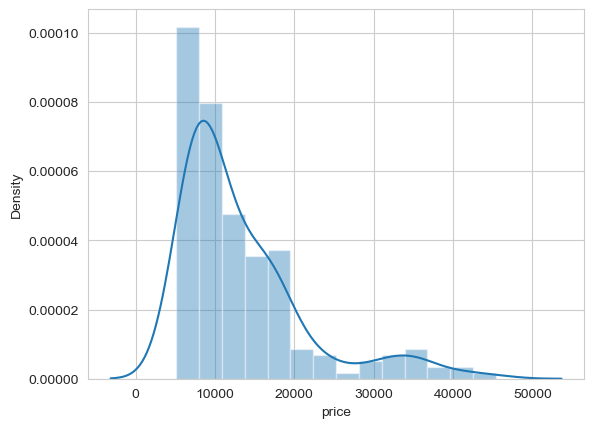

In [24]:
# distplot of the price column
sns.histplot(
    df["price"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)

<Figure size 900x900 with 0 Axes>

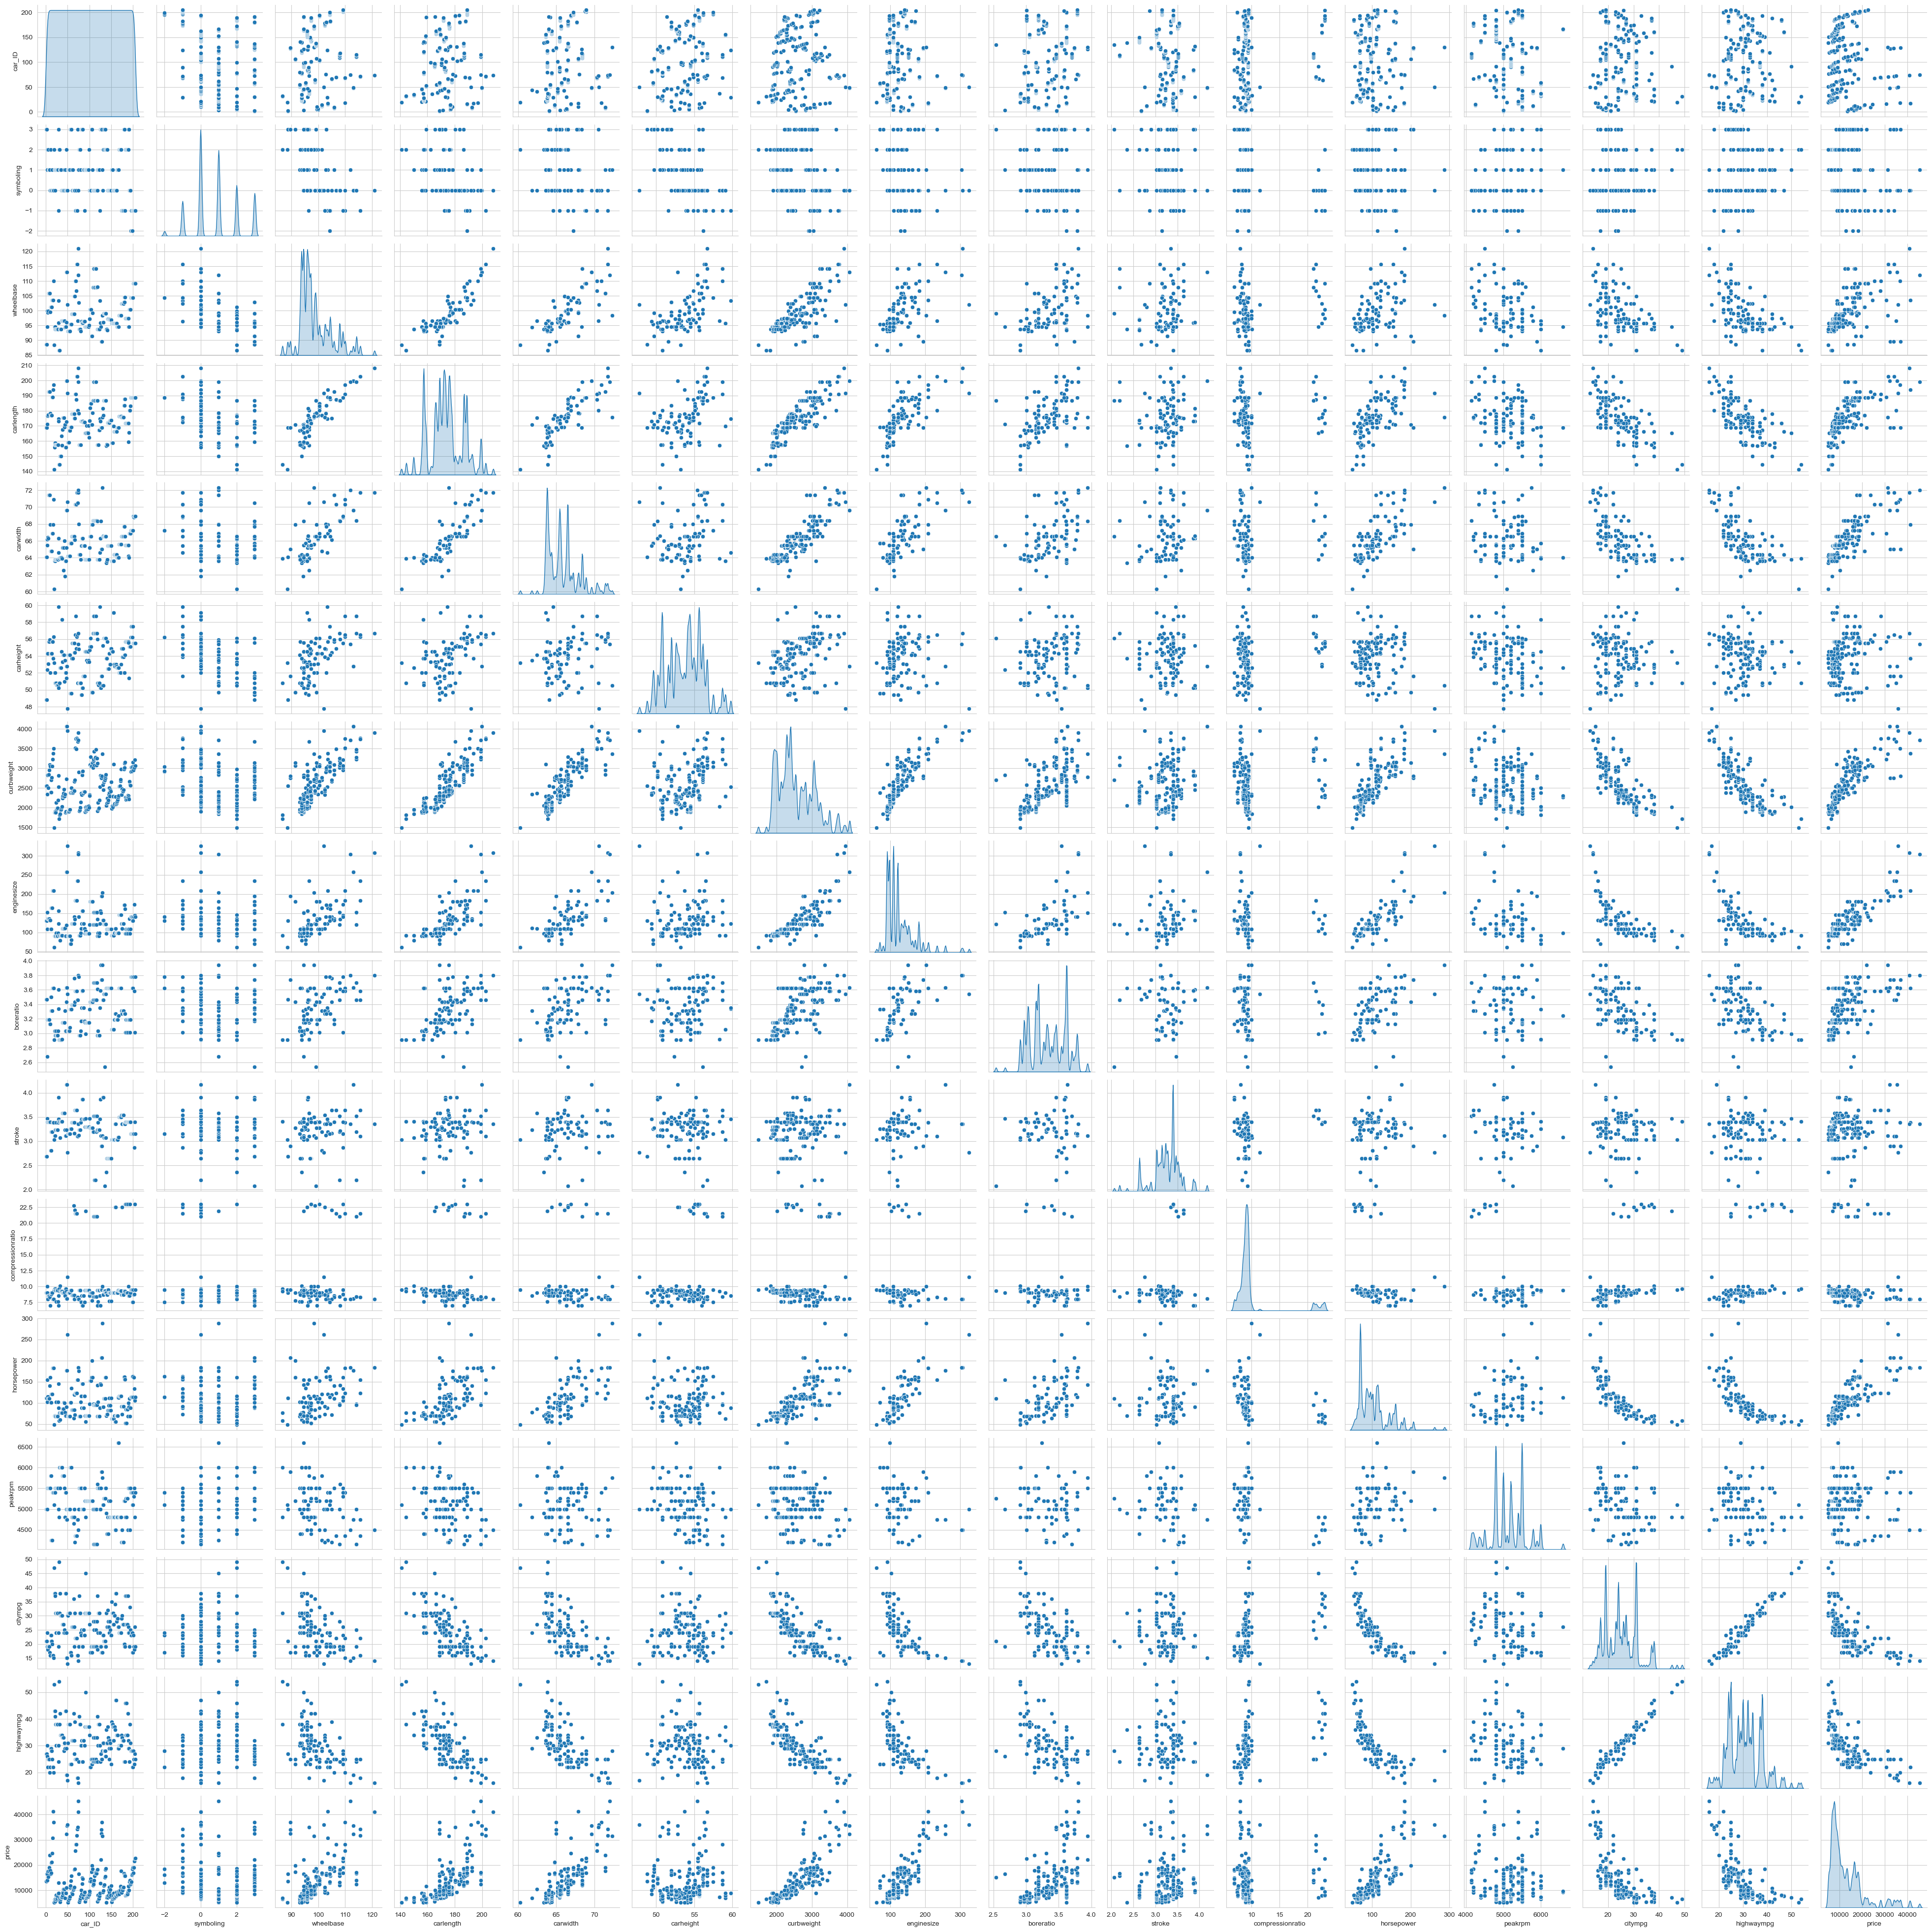

In [28]:
# A pairplot plot a pairwise relationships
plt.figure(figsize=(9,9))
sns.pairplot(df,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

### Splitting the data into features and target variable

In [29]:
x = df.drop(['price', 'CarName', 'fueltype', 'aspiration',	'doornumber', 'carbody',	'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], axis=1)
x

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [30]:
y = df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

### Splitting the data into training and testing sets

In [31]:
# Importing train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

### Creating Model
#### Linear Regression

In [32]:
# Importing Linear Regression library
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Prediction

In [33]:
y_pred = model.predict(x_train)
y_pred

array([ 6271.72751454, 15622.271792  ,  6989.73159525, 13288.99970609,
       40200.11605636,  6146.8101411 , 31996.8022267 , 22755.45228305,
        6572.61052016, 10793.1945248 ,  7319.6406051 ,  7935.75747486,
       16555.24798938, 18974.66302038, 31823.28857972, 14518.87098214,
       18447.74756596, 17640.86893809,  6811.67808287, 10424.25227088,
        7223.09939735,  9150.35076216, 16014.56090325,  9030.01276841,
       10615.32988253, 34608.56553991, 47584.27397997, 15593.93072149,
       11050.94968687,  9305.99584441, 10308.58125602,  6733.55509063,
        6541.85148314,  6570.19580313,  9300.10792616, 10921.87807796,
        8630.99578975,  5749.15147124, 10752.62806527, 11579.42609701,
        9906.47883796,  9812.75364835,  8764.46753145, 11970.81437825,
       25245.22816745,  8059.54597816, 14940.61253075,  6662.23276501,
       13669.97091942,  5602.57372437, 28925.12028699,  7284.14580577,
        6646.48343149, 21522.35775579,  7768.01932929,  8769.2267117 ,
      

### Error Square

In [34]:
from sklearn import metrics

error_square = metrics.r2_score(y_train, y_pred)
print("Error square: ", error_square)

Error square:  0.8817673815063806


### Actual vs Predicted Price Graph

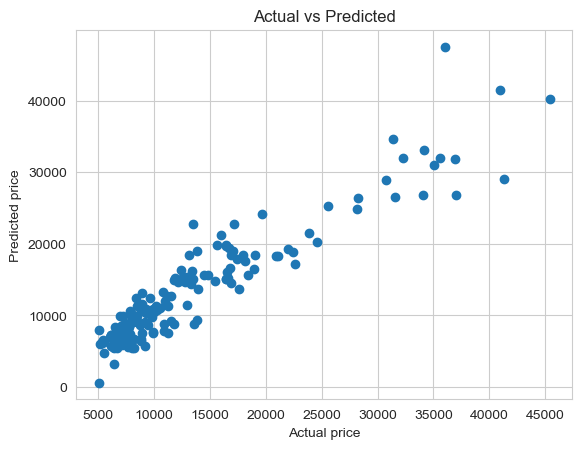

In [35]:
plt.scatter(y_train,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("Actual vs Predicted")
plt.show()

#### Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model1.fit(x_train, y_train)

Lasso()

### Predicition

In [37]:
y_pred1 = model1.predict(x_train)
y_pred1

array([ 6274.88505379, 15628.56589465,  6982.10295291, 13296.20948188,
       40193.40290054,  6143.1138954 , 32009.49301509, 22750.11644778,
        6574.92778154, 10803.05212047,  7314.44424745,  7935.64706422,
       16558.6371428 , 18986.76550315, 31820.10781365, 14522.43013295,
       18455.66941903, 17634.09670037,  6804.52519965, 10417.92450802,
        7212.4330373 ,  9160.49766479, 16031.15726133,  9029.30660284,
       10623.54148671, 34602.17313042, 47561.04736056, 15613.06239519,
       11055.86069959,  9291.83321859, 10312.89649641,  6737.82163324,
        6544.18475038,  6572.46202515,  9295.60497384, 10924.51385323,
        8633.58835365,  5743.5310043 , 10755.97632994, 11584.89609571,
        9907.86501217,  9825.53746792,  8764.50023603, 11977.92098236,
       25248.9609517 ,  8057.77198118, 14934.53512353,  6652.93148943,
       13681.18255602,  5588.26155191, 28932.02656784,  7278.96404454,
        6646.98532165, 21506.86578517,  7771.28566202,  8769.28599304,
      

### Error Square

In [38]:
error_square = metrics.r2_score(y_train, y_pred1)
print("Error square: ", error_square)

Error square:  0.8817662802867985


### Actual vs Prediction

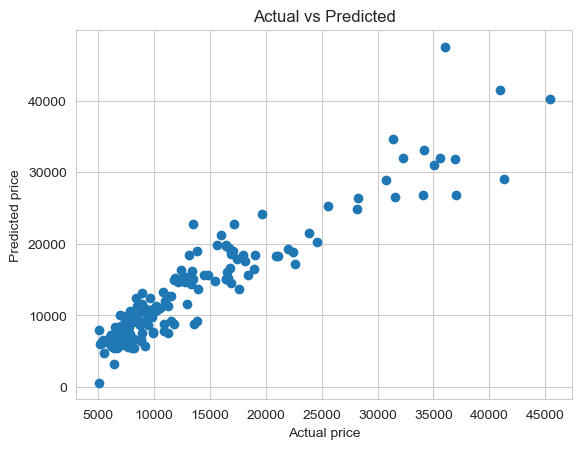

In [39]:
plt.scatter(y_train, y_pred1)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("Actual vs Predicted")
plt.show()

### Conclusion
- In this task, I took Car Price dataset and performed Linear Regression and Lasso Regression Algorithms to make model.
- Many analyses of the dataset were performed.
- Many visualizations of the dataset were created.
- Finally, I plotted a graph for actual vs. predicted values.
